In [53]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as patches

Path = mpath.Path

## -OPERACOES MATEMATICAS/




In [54]:
# Soma de vetores
# (n,m) + (a,b) = (n+a, n+b)  -> se (n,m) = v1 e (a,b) = v2, então (n+a, n+b) = v1+v2
def somaVetor(vet1, vet2):
    return tuple(map(lambda a,b: a+b, vet1,vet2))

print (somaVetor([800,9],[1,1]))

(801, 10)


In [55]:
# Subtração de vetores
# (n,m) - (a,b) = (n-a, n-b)  -> se (n,m) = v1 e (a,b) = v2, então (n-a, n-b) = v1-v2
def subVetor(vet1, vet2):
    return tuple(map(lambda a,b: a-b, vet1,vet2))

print (subVetor([800,9],[1,1]))

(799, 8)


In [56]:
#Vetor por escalar
# (n,m) * (k) = (n*k, m*k)   -> se (n,m) = v1, então (n*k, m*k) = v1*k
def prodPorEscalar(vet1, fat):
    return tuple(map(lambda a: a*fat, vet1))

print (prodPorEscalar([4,12],3))

(12, 36)


In [57]:
#Equação Vetorial da Reta
# r = Po + (t * u)   <-  Po = (n,m); t = (a,b); u = k.
# r = (n,m) + ((a,b)*k)
vetReta = lambda p, t: lambda u: somaVetor(p, prodPorEscalar(t,u))

vetReta((0, 0.8), (0.2, 0.8))(1)
vetReta((0,0.8),(-1,0))(0)
    

(0, 0.8)

In [58]:
#Equação Vetorial-Paramétrica da Reta 
# r = Po + ((t - p) * u)   <-  Po = (n,m); t = (a,b); u = k.
# r = (n,m) + (((a,b)-(n,m))*k)
vetRetaP = lambda p, t: lambda u: somaVetor(p, prodPorEscalar(subVetor(t,p),u))

vetRetaP((0, 0.8), (0.2, 0.8))
vetRetaP((0,0.8),(-1,0))
 

<function __main__.<lambda>.<locals>.<lambda>(u)>

## DEFINIÇÃO DAS FORMAS - CURVS, RETAS, CIRCUNFERÊNCIAS, ELIPSES, ETC. 
##### A ordem é definida pelos indíces na imagem. 

In [59]:
### DEFINIÇÃO DOS PONTOS DE CURVAS E RETAS.
#######A ORDEM ESTA DESCRITA NA IMAGEM!!!
#Conferir a parte à qual pertence do carro pela imagem "Índice - Carroceria"

#variáveis de prefixo 'r' são retas.
    #por exemplo: r2 é reta r2 na imagem.
#Variáveis de com prefixo C são curvas.
    #por exemplo na variável C7_1x:
        #7 é o indíce da curva (definido na imagem)
        #1 é a posição do ponto na curva
        #1 quer dizer que esse é o ponto do meio da curva; o ponto de controle.
            #0 e 2 são, respectivamente, o primeiro e o último ponto da curva
            #Normalmente o ponto 1 é relativo ao ponto 0 e 2 ao 1, mas isso pode variar
            #Para funções cúbicas (que tem 4 pontos), o valor para seus pontos
                #vai de 0 à 3, sendo 0 e 3 as extremidades e 1 e 2 os pontos de controle
        #o ultimo elemento da variável pode ser x ou y, referente ao eixo que define o ponto

#Parachoque-Traseiro, Baixo - Curva #1
C1_0x = -0.1;          C1_0y = 0.4;   #Extremidade. Ponto 0 da curva. Seu vetor é (0.0, 0.4)
C1_1x = -0.45;        C1_1y = 0.6; #Ponto de controle. Ponto 1 da curva. Afeta a curvatura. Seu vetor é (-0.45,0.6)
C1_2x = -0.5;         C1_2y = 0.7; #Extremidade. Ponto 2 da curva. Seu vetor é (-0.5, 0.7)
#1


r2 = vetReta((C1_2x, C1_2y), (-0.01, 0.1)) #ParaChoque traseiro #2
r3 = vetReta(r2(1), (0.04, 0.05)) #Farol traseiro #3
r4 = vetReta(r3(1), (.05,0.3)) #Farol traseiro #4
r5 = vetReta(r4(1), (-.04, 0.1)) #Acima do farol #5


#Base do Aerofólio #6
C6_0x = r5(1)[0];     C6_0y = r5(1)[1];
C6_1x = C6_0x+0.23;   C6_1y = C6_0y-0.06; #As coordenadas desse ponto são relativa ao ponto anterior (C6_0)
C6_2x = C6_1x+0.23;   C6_2y = C6_1y+0.06;
#6

#Teto-Lateral - Curva #7
C7_0x = C6_2x;        C7_0y = C6_2y;
C7_1x = C7_0x+1;      C7_1y = C7_0y+0.4;
C7_2x = C7_1x+.5;     C7_2y = C7_1y-0.6;
#7


r8 = vetReta((C7_2x, C7_2y), (0.8,0)) #Capô #8


#Capo-Farol Dianterio - Curva #9
C9_0x = r8(1)[0];     C9_0y = r8(1)[1];
C9_1x = C9_0x+1;      C9_1y = C9_0y-0.1;
C9_2x = C9_1x+.3;     C9_2y = C9_1y-0.5;
#9

#Parachoque Dianteiro - Curva #10 
C10_0x = C9_2x;       C10_0y = C9_2y;
C10_1x = C10_0x-.1;   C10_1y = C10_0y-.001;
C10_2x = C10_1x;      C10_2y = C10_1y-.15;
#10


# -.1 = -0.1
r11 = vetReta((C10_2x, C10_2y), (0.1, -.001))  #Parachoque Dianteiro #11

r12 = vetReta((r11(1)[0], r11(1)[1]), (-0.05, -0.05)) #Parachoque Dianteiro #12

r13 = vetReta((r12(1)[0], r12(1)[1]), (-0.5, -0.01)) #Parachoque Dianteiro #13



#Paralama dianteiro - Curva (Cúbica) #14
C14_0x = r13(1)[0];   C14_0y = r13(1)[1];
C14_1x = C14_0x;      C14_1y = C14_0y+0.6;
C14_2x = C14_0x-0.8;  C14_2y = C14_0y+0.6;
C14_3x = C9_0x;       C14_3y = C14_0y-.01;  #Alinhado com a interseção entra a reta 8 e a curva 9 (meio do capô)
#14


#reta r15 #Saia lateral
r15 = vetRetaP((C14_3x, C14_3y), (C7_1x, C14_3y+.05))



#Saia lateral #Curva #16
C16_0x = r15(1)[0];    C16_0y = r15(1)[1];
C16_1x = C16_0x-.1;   C16_1y = C1_0y+.02;
C16_2x = C16_0x-.3;     C16_2y = C1_0y+.03;
#16

#Paralama traseiro - Curva (Cúbica) # 17
C17_0x = C1_0x;       C17_0y = C1_0y;
C17_1x = 0;             C17_1y = C14_1y+.01;
C17_2x = 0.6;             C17_2y = C14_1y+.01;
C17_3x = C16_2x;       C17_3y = C16_2y;
#17


#Pneu Dianteiro - Circunferência #18
#18 - AUMENTAR A ESPESSURA NA HORA DE PLOTAR

#Pneu Traseiro - Circunferência # 19
#19 - AUMENTAR A ESPESSURA NA HORA DE PLOTAR



### DEFINIÇÃO DOS PONTOS DE CURVAS E RETAS. 



## ORGANIZACÃO DAS RETAS PARA PLOTAGEM

In [60]:
### DEFINIÇÃO DAS RETAS

pontos = [r2,r3,r4,r5,r8,r11, r12, r13, r15] #Lista com todas as retas --- Coloque a variável das retas aqui.

#Função que desenha os pontos da reta. Itera sobre a lista dada e plota cada uma das retas.
def retasIntervaladas(pontos): 
    for r in pontos:
        plt.plot([r(0)[0], r(1)[0]],
                [r(0)[1], r(1)[1]],
                color = 'r')






        






## ORGANIZAÇÃO DAS CURVAS QUADRÁTICAS PARA PLOTAGEM

In [61]:
### DEFINIÇÃO DAS CURVAS QUADRÁTICAS
verts = [(C1_0x, C1_0y), # P0
         (C1_1x, C1_1y), # P1
         (C1_2x, C1_2y), # P2
         
         (C6_0x, C6_0y), # P0
         (C6_1x, C6_1y), # P1
         (C6_2x, C6_2y), # P2
         
         (C7_0x, C7_0y), # P0
         (C7_1x, C7_1y), # P1
         (C7_2x, C7_2y), # P2
         
         (C9_0x, C9_0y), # P0
         (C9_1x, C9_1y), # P1
         (C9_2x, C9_2y), # P2
         
         (C10_0x, C10_0y), # P0
         (C10_1x, C10_1y), # P1
         (C10_2x, C10_2y), # P2
         
         (C16_0x, C16_0y), # P0
         (C16_1x, C16_1y), # P1
         (C16_2x, C16_2y), # P2
         ] #Para a curva ser desenhada, seus pontos devem ser colocados nesta lista
            #Coloque somente curvas quadradas (que tem 3 pontos)

#Codes é uma lista de instruções do que fazer com cada ponto de verts
codes = []
for i in range(0,len(verts)):   #Essa função cria uma lista de codes baseado no tamanho de verts
#     print (i, end=" ")
    if (i % 3 == 0 or i == 0):
        codes.append(Path.MOVETO)
#         print("a")
    else:
        codes.append(Path.CURVE3)
#         print("b")


## ORGANIZAÇÃO DAS CURVAS CÚBICAS

In [62]:
### DEFINIÇÃO DAS CURVAS CÚBICAS

#Lista somente com curvas cúbicas (de 4 pontos). Segue o mesmo padrão das quadráticas.
cVerts = [(C14_0x, C14_0y), # P0
          (C14_1x, C14_1y), # P1
          (C14_2x, C14_2y), # P2
          (C14_3x, C14_3y),  # P3
          
          (C17_0x, C17_0y), # P0
          (C17_1x, C17_1y), # P1
          (C17_2x, C17_2y), # P2
          (C17_3x, C17_3y),  # P3
         ]

cCodes = []
for i in range(0,len(cVerts)):
#     print (i, end=" ")
    if (i % 4 == 0 or i == 0):
        cCodes.append(Path.MOVETO)
#         print("a")
    else:
        cCodes.append(Path.CURVE4)
#         print("b")
          

cPath = Path(cVerts, cCodes)

#JUNÇÃO DE QUADRÁTICAS E CÚBICAS

verts += cVerts #Junta a lista de cúbicas com a de quadráticas
codes += cCodes #Junt os comandos de quadráticas com as de cúbicas

          
### DEFINIÇÃO DAS CURVAS


# print(codes)

path = Path(verts, codes) # constroi o caminho das retas à partir dos vertices e dos comandos.

## PLOTAGEM DOS GRÁFICOS

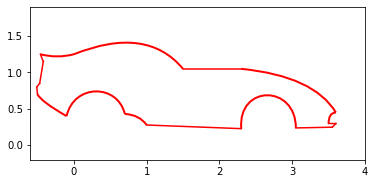

In [63]:
#Define características dos gráficos.
#path define uma segmentação à partir de pontos.
#facecolor define uma cor para à area das funcões
#edgecolor define uma cor para as linhas.
#lw é line-weight. Define a espessura das linhas
patch = patches.PathPatch(path, facecolor='none',
                         edgecolor='red', lw=2) 


ax = plt.gca();

ax.add_patch(patch)

#xs, ys = zip(*verts)

ax.set_xlim(-.6, 4) #Define os limites no eixo x do gráfico. 
ax.set_ylim(-.2, 1.9) #Define os limites no ixo y do gráfico.
ax.set_aspect(1) # 'auto'; 'equal'; number (equal = 1)
# plt.plot([0,0], [2, 2], color = 'k')

retasIntervaladas(pontos)



plt.show()